In [2]:
autosave 30

Autosaving every 30 seconds


In [3]:
#Various imports
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Descrizione del dataset
The dataset contains includes a hourly/daily summary for Szeged, a city located in Hungary, between 2006 and 2016
Available at: [*Weather in Szeged*](https://www.kaggle.com/budincsevity/szeged-weather/discussion)

In [88]:
#Define paths
df_path = "./resources/weatherHistory.csv"
destination_path = "./results/"

In [5]:
#Defining portion for train, validation and testing phase
validation_portion = 0.3
test_portion = 0.1 

In [6]:
#Load the dataset from memory 
df = pd.read_csv(df_path)

In [26]:
#Print dataset's head                     
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [27]:
#Printing features' information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [28]:
#Printing some feature's information
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


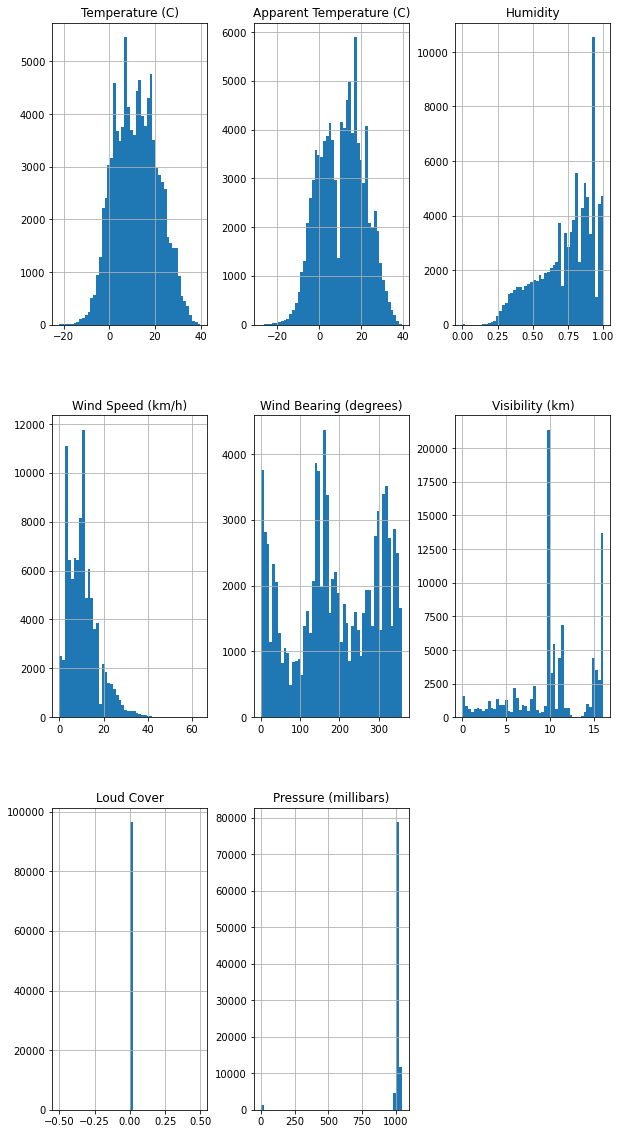

In [29]:
#Print data distribution
df.hist(bins = 50, figsize = (10,20))
plt.show()

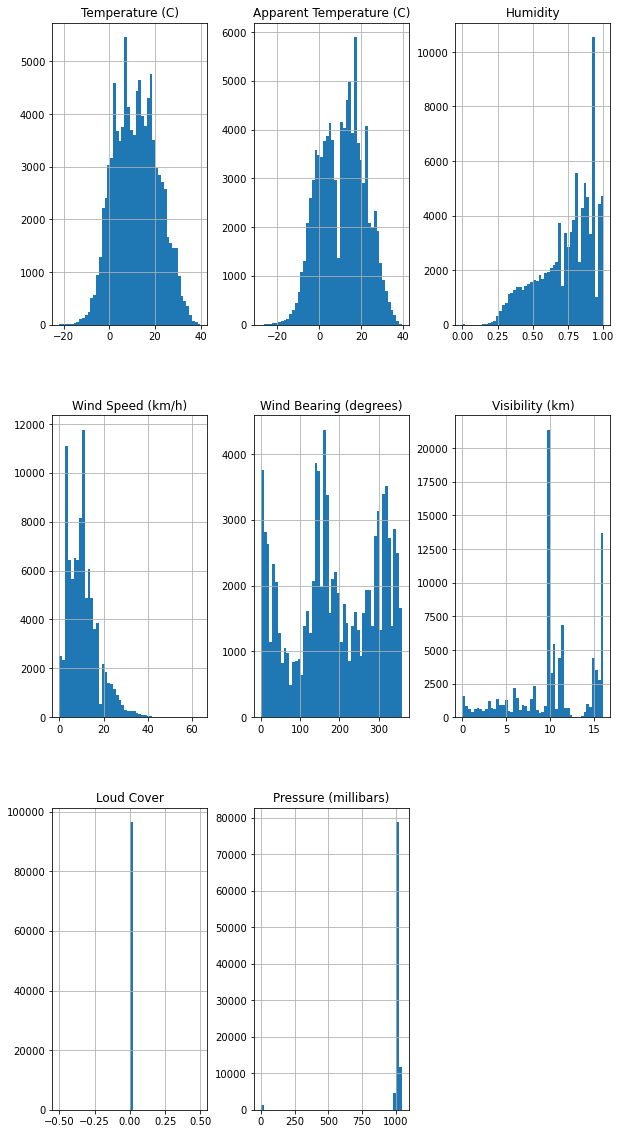

In [30]:
#Print data distribution
df.hist(bins = 50, figsize = (10,20))
plt.show()

In [55]:
#Just for reduce the name of columns used
df = df.rename(columns = {"Temperature (C)":"Temperature",
                          "Wind Speed (km/h)":"Wind Speed",
                           "Apparent Temperature (C)":"Apparent Temperature"})

In [57]:
#Splitting the dataset into train, validation and test dataset
[dfTrain,dfTest] = train_test_split(df,random_state=1,test_size=test_portion) 
[dfTrain,dfValidation] = train_test_split(dfTrain,random_state=1,test_size=validation_portion) 
dfTrain

,Formatted Date,Summary,Precip Type,Temperature,Apparent Temperature,Humidity,Wind Speed,Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
12509,2007-07-13 05:00:00.000 +0200,Partly Cloudy,rain,11.338889,11.338889,0.78,10.8997,270.0,14.9569,0.0,1019.60,Partly cloudy starting in the morning.
45971,2011-12-06 11:00:00.000 +0100,Mostly Cloudy,rain,6.088889,3.777778,0.65,10.9963,241.0,9.9820,0.0,1014.47,Foggy overnight.
7624,2006-10-21 17:00:00.000 +0200,Mostly Cloudy,rain,20.166667,20.166667,0.40,8.1305,160.0,9.9820,0.0,1010.25,Mostly cloudy throughout the day.
80698,2015-12-21 13:00:00.000 +0100,Foggy,rain,3.716667,1.072222,0.94,10.3201,163.0,1.0948,0.0,1030.54,Foggy throughout the day.
51493,2011-10-22 14:00:00.000 +0200,Overcast,rain,8.944444,7.900000,0.71,7.4865,39.0,11.0768,0.0,1027.01,Mostly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
73004,2014-02-08 20:00:00.000 +0100,Mostly Cloudy,rain,7.638889,5.416667,0.96,12.3326,160.0,9.7566,0.0,1007.55,Mostly cloudy throughout the day.
56442,2012-07-16 18:00:00.000 +0200,Partly Cloudy,rain,23.838889,23.838889,0.36,25.3736,319.0,9.9820,0.0,1019.65,Partly cloudy starting overnight continuing un...
67593,2013-05-23 10:00:00.000 +0200,Mostly Cloudy,rain,13.844444,13.844444,0.88,23.6187,340.0,11.2700,0.0,1001.81,Mostly cloudy throughout the day.
70994,2014-08-14 02:00:00.000 +0200,Partly Cloudy,rain,23.361111,23.361111,0.83,6.6010,171.0,15.1823,0.0,1007.02,Partly cloudy throughout the day and breezy st...


# First regression: Correlation between Temperature And Humidity

In [14]:
result_path = "/results_Temperature_Humidity.txt"

In [81]:
x_train = dfTrain["Temperature"].values
y_train = dfTrain["Humidity"].values

x_validation = dfValidation["Temperature"].values
y_validation = dfValidation["Humidity"].values

x_test = dfTest["Temperature"].values

x_train = np.reshape(x_train,(-1,1))
x_validation = np.reshape(x_validation,(-1,1))
x_test = np.reshape(x_test,(-1,1))

In [82]:
reg = LinearRegression()

reg.fit(x_train,y_train)

print(f"Intercept: {reg.intercept_}")
print(f"Coefficient: {reg.coef_}")

Intercept: 0.8894807259742661
Coefficient: [-0.01295996]


In [83]:
y_train_predicted = reg.predict(x_train)
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_predicted))
print(f"RMSE train set: {rmse_train}")

y_validation_predicted = reg.predict(x_validation)
rmse_validation = np.sqrt(mean_squared_error(y_validation,y_validation_predicted))
print(f"RMSE validation set: {rmse_validation}")

RMSE train set: 0.15114404460366634
RMSE validation set: 0.15180928055749712


In [84]:
R2_score_validation = reg.score(x_validation,y_validation)
print(f"R2 score validation: {R2_score_validation}")

R2 score validation: 0.3993329054240695


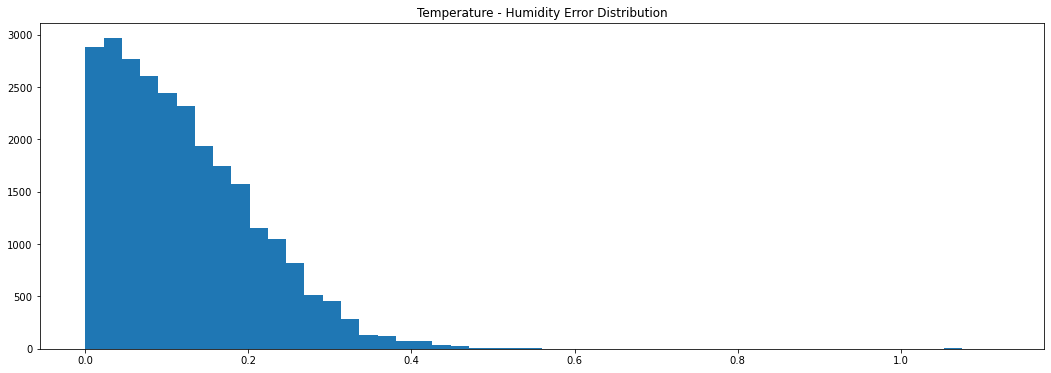

In [85]:
residuals = np.abs(y_validation - y_validation_predicted)
#Print errors distribution
plt.figure(figsize=(18,6))
plt.title("Temperature - Humidity Error Distribution")
plt.hist(x = residuals, bins = 50)
plt.show()

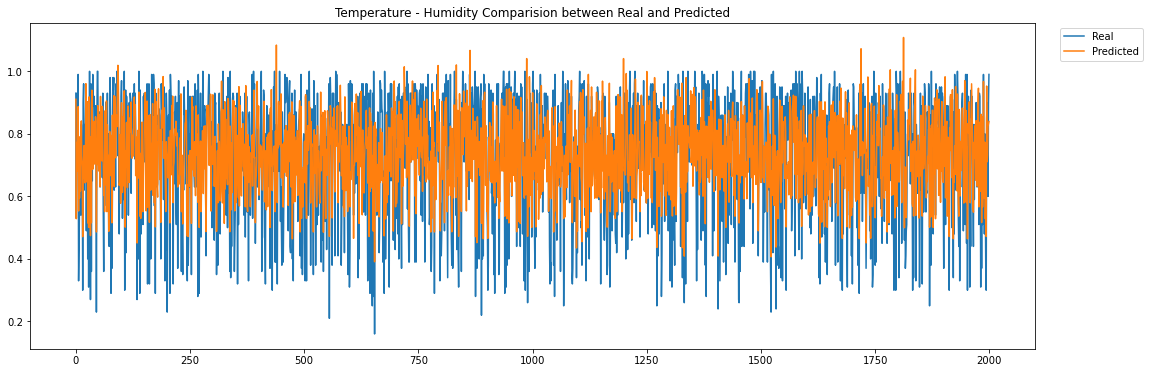

In [86]:
plt.figure(figsize=(18,6))
plt.plot(y_validation[0:2000], label ="Real")
plt.title("Temperature - Humidity Comparision between Real and Predicted")
plt.plot(y_validation_predicted[0:2000], label="Predicted")
plt.legend(bbox_to_anchor=(1.02,1),loc="upper left",  borderaxespad=0.5)
plt.show()

In [87]:
x_test_predicted = reg.predict(x_test)
rmse_test = mean_squared_error(x_test,x_test_predicted)
print(f"RMSE test {rmse_test}")
np.savetxt(destination_path + result_path,predictions)

RMSE test 218.73902663177398


NameError: name 'result_path' is not defined

# Predicting Apparent Temperature at a certain hour

The apparent temperature could be influenced by the combined effect of air temperature, relative temperature and wind speed. It could be very interesting to demonstrate if exists truly correlation among them.

In [118]:
xTrain = dfTrain[["Temperature","Humidity","Wind Speed"]].values
yTrain = dfTrain["Apparent Temperature"].values

xValidation = dfValidation[["Temperature","Humidity","Wind Speed"]].values
yValidation = dfValidation["Apparent Temperature"].values

xTest = dfTest[["Temperature","Humidity","Wind Speed"]].values
yTest = dfTest["Apparent Temperature"].values

In [108]:
#Getting parameters regression
reg = LinearRegression()
reg.fit(xTrain,yTrain)
print(f"Intercept: {reg.intercept_}")
print(f"Coefficients:{reg.coef_}")

Intercept: -2.331255537356853
Coefficients:[ 1.1261935   1.05501954 -0.09490606]


In [113]:
#Checking how regressior behaviours with train and validation set
yTrainPredicted = reg.predict(xTrain)
RMSETrain = np.sqrt(mean_squared_error(yTrain,yTrainPredicted))
print(f"RMSE train set: {RMSETrain}")

yValidationPredicted = reg.predict(xValidation)
RMSEValidation = np.sqrt(mean_squared_error(yValidation,yValidationPredicted))
print(f"RMSE validation set: {RMSEValidation}")

RMSE train set: 1.0752758675558702
RMSE validation set: 1.0903252186003443


In [115]:
R2Validation = reg.score(xValidation,yValidation)
print(f"R2 score validation: {R2Validation}")

R2 score validation: 0.9897060759343201


In [131]:
#Try to predict
xTestPredicted = reg.predict(xTest)

ValueError: y_true and y_pred have different number of output (3!=1)